## **Data Preprosessing**
<details><summary>Data Preprosessing（前処理）について</summary><div>

これは、データに含まれる文字データや欠損値の置換など、データ分析の**前処理**を行い、その後、**基本統計量や可視化**を行うものです。
欠損値や異常データは削除せずに、可能な限りわかる形で残し、カテゴリーデータはラベルエンコーディング（※以下参照）を行うことを基本としています。
実行できる前処理は、① 指定したカラムを削除、② データの7割以上が欠損値のカラムを削除、③ カラム名に [ID] [Lot] を含まれる場合、削除、④ 16進数カラムを指定、10進数に変換、⑤ 指定カラムをカテゴリー（数値）変換、⑥ 異常な文字データを指定番号に置換、⑦ NAデータを指定番号に置換、⑧ 日本語カラムを英語翻訳、⑨ object要素が残っている場合、floatに変換 となります。


<details><summary>[使用方法]</summary><div>

- **基本的には、上から順に実行するようにしてください。**
- ②③⑧⑨は実行する／しないを任意に設定できます。
- ①④⑤はデータセットに応じてカラムを指定してください。
- ⑥の**異常データ**の数値置換は[**-99**]、**NAデータ**は[**-1**]をデフォルトとしています。別の数値にする場合は任意に設定してください。
- 前処理が問題なく実行出来たら、**DataPrep html Report Output**を実行してください。保存したhtmlを起動するとデータ可視化、操作ができます。
- 前処理後のデータで別の分析を行う場合は**前処理結果 csv出力**を実行してください。csvデータを保存することができます。


<details><summary>[追記]</summary><div>

- Uploadするデータに欠損値がなく、かつすべて数値データである場合、これら前処理は実行の対象となりませんので何も影響はありません。
- ラベルエンコーディングは、例えば [優] [良] [可] [不可] を [0] [1] [2] [3] とする処理です。数値は 0～ 割り振られます。該当の前処理セル実行後、[優、良、可]等と表示されます。[優, 良, 可]＝[0, 1, 2] という対応になります。
- カテゴリーデータに含まれるNA以外の異常値は判定できませんので、異常な値もカテゴリー化されます。これはデータで判断してください。
- カテゴリーデータのエンコーディングは、決定木モデルでの解析を意識し、ラベルエンコーディングのみとしています。他のモデルで分析する場合、適切ではないこともあります。

In [ ]:
#@title Select_Dataset { run: "auto" }
#@markdown  **<font color= "Crimson">注意</font>：かならず 実行する前に 設定してください。**</font>

dataset = 'Upload' #@param ['Boston_housing :regression', 'Diabetes :regression', 'Breast_cancer :binary','Titanic :binary', 'Iris :classification', 'Loan_prediction :binary', 'Upload']

#@title **Classification**（分類）or **Regression**（回帰）
dataset_type = 'Classification' #@param ["Classification", "Regression"]


<details><summary>dataset について : 
データをアップロードする場合は [ Upload ]を選択してください。Boston_housing :regression / Diabetes :regression / Breast_cancer :binary / Titanic :binary / Iris :classification / Loan_prediction :binary はデータセットサンプルです。</summary><div>

- Boston_housing :regression　← ボストン市郊外の「犯罪発生率」や「広い部屋の割合」等と「住宅価格」の回帰データ。欠損値なし。すべてのカラムが数値のデータ。

- Diabetes :regression　← 糖尿病患者の「年齢」「性別」と「8項目の診断データ」と「1年後の進行度（数値）」の回帰データ。欠損値なし。「8項目の診断データ」は標本平均と標本分散で標準化（平均0, 標準偏差1）されている。

- Breast_cancer :binary　← 乳がんのさまざまな「診断データ」と「陽性・陰性（陽性:1, 陰性:0）」の二値分類データ。欠損値なし。すべてのカラムが数値のデータ。

- Titanic :binary　← タイタニック号 乗客者の「性別」「年齢」「チケットクラス」等と「生存情報（Survived）」のデータ。Survived：0（死亡）,1（生存）の二値分類。欠損値があり、文字列のカラムも複数あるデータ。

- Iris :classification　← 「がく片」「花びらの幅」「長さ」と「3種類のアヤメ [Setosa, Virginia, Versicolor]」 の分類データ。欠損値なし。分類データである [Setosa, Virginia, Versicolor] は文字データ。

- Loan_prediction :binary　←　住宅ローン顧客の「性別」「配偶者の有無」「学歴」「扶養家族の数」「収入」「融資額」「クレジットヒストリー」などの情報と「ローン承認のStatus：Loan_Status(Y/N)」の二値分類データ。欠損値があり、文字列カラムも複数あるデータ。分類データである「Loan_Status」も 文字データ[Y,N] となっている。

- Upload　← 任意のデータセットを読み込む場合はこれを選択してください。
</div></details>
<details><summary>dataset_typeについて ：Classification（分類データ）か Regression（回帰データ）のいずれかを選択してください。</summary><div>

### ライブラリのインストール

In [ ]:
!pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.5 MB 6.8 MB/s 
     |████████████████████████████████| 943 kB 60.5 MB/s 
     |████████████████████████████████| 133 kB 60.6 MB/s 
     |████████████████████████████████| 1.0 MB 50.7 MB/s 
     |████████████████████████████████| 965 kB 43.4 MB/s 
     |████████████████████████████████| 28.5 MB 2.7 MB/s 
     |████████████████████████████████| 435 kB 44.6 MB/s 
     |████████████████████████████████| 749 kB 42.2 MB/s 
     |████████████████████████████████| 50 kB 3.9 MB/s 
     |████████████████████████████████| 78 kB 3.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 95 kB 3.8 MB/s 
     |████████████████████████████████| 141 kB 42.5 MB/s 
     |████████████████████████████████| 96 kB 5.3 MB/s 
     |████████████████████████

In [ ]:
!pip install googletrans==4.0.0-rc1 --quiet

     |████████████████████████████████| 55 kB 2.8 MB/s 
     |████████████████████████████████| 1.4 MB 18.4 MB/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
     |████████████████████████████████| 65 kB 3.5 MB/s 
     |████████████████████████████████| 53 kB 1.8 MB/s 


### Load dataset



In [ ]:
#@title Load dataset

#ライブラリインポート
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter('ignore')


if dataset =='Upload':
  from google.colab import files
  uploaded = files.upload()#Upload
  target = list(uploaded.keys())[0]
  df = pd.read_csv(target)

elif dataset == "Diabetes :regression":
  from sklearn.datasets import load_diabetes
  dataset = load_diabetes()
  df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
  df["target"] = dataset.target

elif dataset == "Breast_cancer :binary":
  from sklearn.datasets import load_breast_cancer
  dataset = load_breast_cancer()
  df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
  df["target"] = dataset.target

elif dataset == "Titanic :binary":
  data_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
  df = pd.read_csv(data_url)
  X = df.drop(['Survived'], axis=1) # 目的変数を除いたデータ
  y = df['Survived'] # 目的変数
  df = pd.concat([X, y], axis=1)

elif dataset == "Iris :classification":
  from sklearn.datasets import load_iris
  dataset = load_iris()
  df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
  df["target"] = dataset.target

elif dataset == "Loan_prediction :binary":
  data_url = "https://github.com/shrikant-temburwar/Loan-Prediction-Dataset/raw/master/train.csv"
  df = pd.read_csv(data_url)

else:
  from sklearn.datasets import load_boston
  dataset = load_boston()
  df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
  df["target"] = dataset.target

#X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
#y = pd.Series(dataset.target, name='target')

source = df.copy()

FEATURES = df.columns[:-1]
TARGET = df.columns[-1]
X = df.loc[:, FEATURES]
y = df.loc[:, TARGET]

df.info()
df.head()

Saving X-ZONEデータ整理_r2.csv to X-ZONEデータ整理_r2.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17394 entries, 0 to 17393
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   lot                  17394 non-null  int64  
 1   IF1hoseimae          16293 non-null  float64
 2   IF2hoseimae          16293 non-null  float64
 3   IF1hoseiti           17098 non-null  object 
 4   IF2hoseiti           16182 non-null  object 
 5   IF1hoseiti(hex2dec)  17392 non-null  object 
 6   IF2hoseiti(hex2dec)  17392 non-null  float64
 7   IF1hoseigo           16153 non-null  float64
 8   IF2hoseigo           16153 non-null  float64
 9   IF1noise             17208 non-null  object 
 10  IF2noise             14943 non-null  float64
 11  result01             16878 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


,lot,IF1hoseimae,IF2hoseimae,IF1hoseiti,IF2hoseiti,IF1hoseiti(hex2dec),IF2hoseiti(hex2dec),IF1hoseigo,IF2hoseigo,IF1noise,IF2noise,result01
0,1418,NaN,NaN,---,NaN,NaN,NaN,NaN,NaN,---,NaN,0.0
1,1418,NaN,NaN,---,NaN,NaN,NaN,NaN,NaN,---,NaN,0.0
2,1418,623.0,557.0,FFF0,FFF4,65520,65524.0,437.0,433.0,8,9.0,1.0
3,1418,664.0,593.0,FFEE,FFF2,65518,65522.0,439.0,439.0,8,10.0,1.0
4,1418,705.0,597.0,FFEC,FFF2,65516,65522.0,436.0,438.0,8,10.0,1.0


In [ ]:
#@title Datasetの数字・文字列区分
numerical_col = []
Object_col = []

for col_name, item in df.iteritems():
    if item.dtype == object:
        Object_col.append(col_name)
    else:
        numerical_col.append(col_name)
        
print('-----------------------------------------------------------------------------------------')
print('Numerical_colomn:', numerical_col)
print('-----------------------------------------------------------------------------------------')
print('Object_colomn:', Object_col)
print('-----------------------------------------------------------------------------------------')
print('※ 前処理でカラムを指定する場合は、上記に表示されたカラムを Copy & Paste するとよい')

-----------------------------------------------------------------------------------------
Numerical_colomn: ['lot', 'IF1hoseimae', 'IF2hoseimae', 'IF2hoseiti(hex2dec)', 'IF1hoseigo', 'IF2hoseigo', 'IF2noise', 'result01']
-----------------------------------------------------------------------------------------
Object_colomn: ['IF1hoseiti', 'IF2hoseiti', 'IF1hoseiti(hex2dec)', 'IF1noise']
-----------------------------------------------------------------------------------------
※ 前処理でカラムを指定する場合は、上記に表示されたカラムを Copy & Paste するとよい


### 前処理 選択･実行（全8項目）
- オレンジの前処理は、列を指定した場合のみ実行されます。
- グリーンの前処理は、☑ ⇔ □ で実行する／しない を選択できます。
- ブルーの前処理は、自動実行されます。置換する値は任意に変更できます。

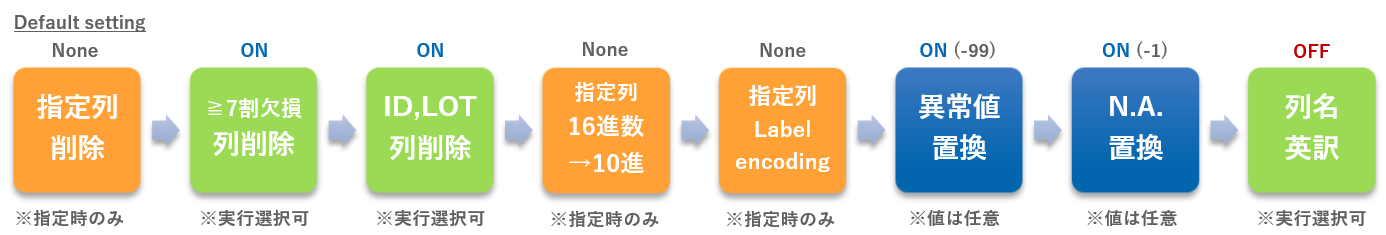

In [ ]:
#@title 指定したカラムを削除
#@markdown  **<font color= "Crimson">注意</font>：指定は <u> ' ID ' , ' Age '  </u> などとしてください。**</font>
Drop_label_is = '' #@param {type:"raw"}

try:
  if Drop_label_is is not "":
    Drop_label_is = pd.Series(Drop_label_is)
    print('-----------------------------------------------------------------------------------------')
    print("drop column:", Drop_label_is.values)
    print('-----------------------------------------------------------------------------------------')
    df.drop(columns=list(Drop_label_is),axis=1,inplace=True)
  else:
    print('※削除カラムの指定なし→処理スキップ')
except:
    print("※正常に処理されませんでした。入力に誤りがないか確認してください。")

df.head()

※削除カラムの指定なし→処理スキップ


,lot,IF1hoseimae,IF2hoseimae,IF1hoseiti,IF2hoseiti,IF1hoseiti(hex2dec),IF2hoseiti(hex2dec),IF1hoseigo,IF2hoseigo,IF1noise,IF2noise,result01
0,1418,NaN,NaN,---,NaN,NaN,NaN,NaN,NaN,---,NaN,0.0
1,1418,NaN,NaN,---,NaN,NaN,NaN,NaN,NaN,---,NaN,0.0
2,1418,623.0,557.0,FFF0,FFF4,65520,65524.0,437.0,433.0,8,9.0,1.0
3,1418,664.0,593.0,FFEE,FFF2,65518,65522.0,439.0,439.0,8,10.0,1.0
4,1418,705.0,597.0,FFEC,FFF2,65516,65522.0,436.0,438.0,8,10.0,1.0


In [ ]:
#@title データの7割以上が欠損値のカラムを削除（☑ ＝実行）
Over_70percent_missing_value_is_drop = True #@param {type:"boolean"}

#各列ごとに、6割欠損がある列を削除
if Over_70percent_missing_value_is_drop == True:
  for col in df.columns:
    nans = df[col].isnull().sum()  # nanになっている行数をカウント

    # nan行数を全行数で割り、7割欠損している列をDrop
    if nans / len(df) > 0.7: 
        # 7割欠損列を削除
        print('-----------------------------------------------------------------------------------------')
        print("drop column:", col)
        print('-----------------------------------------------------------------------------------------')
        df.drop(col, axis=1, inplace=True)    
#    else:
#      print(col,'：OK ⇒ 処理スキップ')
df.head()

,lot,IF1hoseimae,IF2hoseimae,IF1hoseiti,IF2hoseiti,IF1hoseiti(hex2dec),IF2hoseiti(hex2dec),IF1hoseigo,IF2hoseigo,IF1noise,IF2noise,result01
0,1418,NaN,NaN,---,NaN,NaN,NaN,NaN,NaN,---,NaN,0.0
1,1418,NaN,NaN,---,NaN,NaN,NaN,NaN,NaN,---,NaN,0.0
2,1418,623.0,557.0,FFF0,FFF4,65520,65524.0,437.0,433.0,8,9.0,1.0
3,1418,664.0,593.0,FFEE,FFF2,65518,65522.0,439.0,439.0,8,10.0,1.0
4,1418,705.0,597.0,FFEC,FFF2,65516,65522.0,436.0,438.0,8,10.0,1.0


In [ ]:
#@title カラム名に [ID] [Lot] を含まれる場合、削除（☑ ＝実行）
Drop_ID_label = True #@param {type:"boolean"}

include_list = df.columns[df.columns.str.contains('ID|Lot',case=False)]

if Drop_ID_label == True:
  if include_list is not "":
    df.drop(columns=list(include_list),axis=1,inplace=True)
    print('-----------------------------------------------------------------------------------------')
    print("drop column:", list(include_list))
    print('-----------------------------------------------------------------------------------------')
df.head()

-----------------------------------------------------------------------------------------
drop column: ['lot']
-----------------------------------------------------------------------------------------


,IF1hoseimae,IF2hoseimae,IF1hoseiti,IF2hoseiti,IF1hoseiti(hex2dec),IF2hoseiti(hex2dec),IF1hoseigo,IF2hoseigo,IF1noise,IF2noise,result01
0,NaN,NaN,---,NaN,NaN,NaN,NaN,NaN,---,NaN,0.0
1,NaN,NaN,---,NaN,NaN,NaN,NaN,NaN,---,NaN,0.0
2,623.0,557.0,FFF0,FFF4,65520,65524.0,437.0,433.0,8,9.0,1.0
3,664.0,593.0,FFEE,FFF2,65518,65522.0,439.0,439.0,8,10.0,1.0
4,705.0,597.0,FFEC,FFF2,65516,65522.0,436.0,438.0,8,10.0,1.0


In [ ]:
#@title 16進数カラムを指定、10進数に変換（☑ ＝実行）
#@markdown  **<font color= "Crimson">注意</font>：指定は <u> ' ID ' , ' Age '  </u> などとしてください。**</font>

HEX2INT = 'IF1hoseiti', 'IF2hoseiti' #@param {type:"raw"}
HEX2INT = pd.Series(HEX2INT)

import string
for i in HEX2INT:
  if df[i].dtype == 'object':
    for x in df[i]:
      try:
        if set(x).issubset(set(string.hexdigits)) ==True:
          df[i].replace(x, int(x, 16),inplace=True)
      except:
#        print('skip：',i,x)
        pass
df.head()

,IF1hoseimae,IF2hoseimae,IF1hoseiti,IF2hoseiti,IF1hoseiti(hex2dec),IF2hoseiti(hex2dec),IF1hoseigo,IF2hoseigo,IF1noise,IF2noise,result01
0,NaN,NaN,---,NaN,NaN,NaN,NaN,NaN,---,NaN,0.0
1,NaN,NaN,---,NaN,NaN,NaN,NaN,NaN,---,NaN,0.0
2,623.0,557.0,65520,65524.0,65520,65524.0,437.0,433.0,8,9.0,1.0
3,664.0,593.0,65518,65522.0,65518,65522.0,439.0,439.0,8,10.0,1.0
4,705.0,597.0,65516,65522.0,65516,65522.0,436.0,438.0,8,10.0,1.0


In [ ]:
#@title 指定カラムを Labelエンコード
#@markdown  **<font color= "Crimson">注意</font>：指定は <u> ' ID ' , ' Age ' , </u> などとしてください。**
Object_label_to_encode_is = '' #@param {type:"raw"}
Object_label_to_encode_is = pd.Series(Object_label_to_encode_is)

from sklearn.preprocessing import LabelEncoder

encoders = dict()

try:
  for i in Object_label_to_encode_is:
    if Object_label_to_encode_is is not "":
      series = df[i]
      le = LabelEncoder()
      df[i] = pd.Series(
        le.fit_transform(series[series.notnull()]),
        index=series[series.notnull()].index
        )
      encoders[i] = le
      print('-----------------------------------------------------------------------------------------')
      print('[エンコードカラム]：',i)
      le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
      print(le_name_mapping)
    else:
      print('skip')

except:
    print("※正常に処理されなかった場合は入力に誤りがないか確認してください。")
print('-----------------------------------------------------------------------------------------') 
df.head()
#https://stackoverflow.com/questions/54444260/labelencoder-that-keeps-missing-values-as-nan

※正常に処理されませんでした。入力に誤りがないか確認してください。
-----------------------------------------------------------------------------------------


,IF1hoseimae,IF2hoseimae,IF1hoseiti,IF2hoseiti,IF1hoseigo,IF2hoseigo,IF1noise,IF2noise,result01
0,NaN,NaN,---,NaN,NaN,NaN,---,NaN,0.0
1,NaN,NaN,---,NaN,NaN,NaN,---,NaN,0.0
2,623.0,557.0,65520,65524.0,437.0,433.0,8,9.0,1.0
3,664.0,593.0,65518,65522.0,439.0,439.0,8,10.0,1.0
4,705.0,597.0,65516,65522.0,436.0,438.0,8,10.0,1.0


In [ ]:
#@title 異常な objectデータ を指定番号に置換
#@markdown  **<font color= "Crimson">注意</font>：指定は <u> 数値 </u> としてください。**

Replace_number = -99 #@param {type:"raw"}

import string

for i in df.columns:
  for data in df[i]:
    try:
      if data.isdigit() == False:
        df[i].replace(data, Replace_number,inplace=True)
    except:
      #print('skip：',i,data)
      pass
df.head()

,IF1hoseimae,IF2hoseimae,IF1hoseiti,IF2hoseiti,IF1hoseigo,IF2hoseigo,IF1noise,IF2noise,result01
0,NaN,NaN,-99.0,NaN,NaN,NaN,-99,NaN,0.0
1,NaN,NaN,-99.0,NaN,NaN,NaN,-99,NaN,0.0
2,623.0,557.0,65520.0,65524.0,437.0,433.0,8,9.0,1.0
3,664.0,593.0,65518.0,65522.0,439.0,439.0,8,10.0,1.0
4,705.0,597.0,65516.0,65522.0,436.0,438.0,8,10.0,1.0


In [ ]:
#@title N.Aデータ を指定番号に置換
#@markdown  **<font color= "Crimson">注意</font>：指定は <u> 数値 </u> としてください。**

Replace_from_NA_to_number = -1 #@param {type:"raw"}

for col in df.columns:
  if df[col].dtypes is not ( "int64"  or  "float64") :
    df[col] = df[col].fillna(Replace_from_NA_to_number)
df.head()

,IF1hoseimae,IF2hoseimae,IF1hoseiti,IF2hoseiti,IF1hoseigo,IF2hoseigo,IF1noise,IF2noise,result01
0,-1.0,-1.0,-99.0,-1.0,-1.0,-1.0,-99,-1.0,0.0
1,-1.0,-1.0,-99.0,-1.0,-1.0,-1.0,-99,-1.0,0.0
2,623.0,557.0,65520.0,65524.0,437.0,433.0,8,9.0,1.0
3,664.0,593.0,65518.0,65522.0,439.0,439.0,8,10.0,1.0
4,705.0,597.0,65516.0,65522.0,436.0,438.0,8,10.0,1.0
...,...,...,...,...,...,...,...,...,...
17389,643.0,566.0,65519.0,65523.0,438.0,431.0,8,10.0,1.0
17390,658.0,542.0,65518.0,65525.0,432.0,428.0,8,9.0,1.0
17391,-1.0,-1.0,-99.0,-1.0,-1.0,-1.0,-99,-1.0,-1.0
17392,689.0,636.0,65517.0,65519.0,441.0,427.0,-99,-1.0,0.0


In [ ]:
#@title カラム名を英訳（☑ ＝実行）
Column_English_translation = False #@param {type:"boolean"}

from googletrans import Translator

if Column_English_translation == True:

  eng_columns = {}
  columns = df.columns
  translator = Translator()
  
  for column in columns:
    eng_column = translator.translate(column).text
    eng_column = eng_column.replace(' ', '_')
    eng_columns[column] = eng_column
    df.rename(columns=eng_columns, inplace=True)

print('-----------------------------------------------------------------------------------------')
print('[カラム名_翻訳結果（翻訳しない場合も表示）]')
print('-----------------------------------------------------------------------------------------') 
df.head(0)

-----------------------------------------------------------------------------------------
[カラム名_翻訳結果（翻訳しない場合も表示）]
-----------------------------------------------------------------------------------------


,IF1hoseimae,IF2hoseimae,IF1hoseiti,IF2hoseiti,IF1hoseigo,IF2hoseigo,IF1noise,IF2noise,result01


In [ ]:
#@title object要素が残っている場合、floatに変換（☑ ＝実行）
Object_to_float = True #@param {type:"boolean"}

if Object_to_float == True:
  for col in df.columns:
    if df[col].dtypes == "object":
      df[col] = df[col].astype('float64')

In [ ]:
#@title 前処理判定
if df.isnull().values.sum()==0:
  print('-----------------------------------------------------------------------------------------')
  print('[NA処理判定]')
  print('◎：欠損値はありません')
else:
  print('-----------------------------------------------------------------------------------------')
  print('[NA処理判定]')
  print('×：欠損値が',df.isnull().values.sum(),'つあります')
print('-----------------------------------------------------------------------------------------')
print('[各カラムのデータ型]')
print(df.dtypes)
print('※各カラムのデータ型が[float64]か[int64]なら正しく処理されています')
print('-----------------------------------------------------------------------------------------')
df.head()

-----------------------------------------------------------------------------------------
[NA処理判定]
◎：欠損値はありません
-----------------------------------------------------------------------------------------
[各カラムのデータ型]
IF1hoseimae    float64
IF2hoseimae    float64
IF1hoseiti     float64
IF2hoseiti     float64
IF1hoseigo     float64
IF2hoseigo     float64
IF1noise       float64
IF2noise       float64
result01       float64
dtype: object


,IF1hoseimae,IF2hoseimae,IF1hoseiti,IF2hoseiti,IF1hoseigo,IF2hoseigo,IF1noise,IF2noise,result01
0,-1.0,-1.0,-99.0,-1.0,-1.0,-1.0,-99.0,-1.0,0.0
1,-1.0,-1.0,-99.0,-1.0,-1.0,-1.0,-99.0,-1.0,0.0
2,623.0,557.0,65520.0,65524.0,437.0,433.0,8.0,9.0,1.0
3,664.0,593.0,65518.0,65522.0,439.0,439.0,8.0,10.0,1.0
4,705.0,597.0,65516.0,65522.0,436.0,438.0,8.0,10.0,1.0


### Visualization & csv output

In [ ]:
#@title Visualization Report Output
#create_report(df)

from dataprep.eda import create_report
from dataprep.datasets import load_dataset
from dataprep.eda import plot, plot_correlation, plot_missing, plot_diff

report = create_report(df)
report.save('DataPrep_Report')

from google.colab import files
files.download( "/content/DataPrep_Report.html" ) 

E-1019 (DUPLICATE_FACTORS): FactorRange must specify a unique list of categorical factors for an axis: duplicate factors found: 'Before_differ...ion', 'After_differe...ion'


Report has been saved to DataPrep_Report.html!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#@title 前処理結果 csv出力（☑ ＝実行）

csv_output = True #@param {type:"boolean"}

#csv出力
if csv_output == True:
  df.to_csv('after_prepro_data.csv',index=False)
  from google.colab import files
  files.download('after_prepro_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#@title 前処理（異常値･NAカット）結果 csv出力（☑ ＝実行）

csv_output_cut_ver = False #@param {type:"boolean"}

#Replace_number(default：-99)含む行を削除
def remove_any_xx_row(df2):
  df2 = df.copy()
  for row in df2.index:
    if (df2.loc[row] == Replace_number).any():
      df2.drop(row, axis=0, inplace=True)
  return df2
    
#df2 = remove_any_xx_row(df)

#Replace_from_NA_to_number(default：-1)含む行を削除
def remove_any_na_row(df2):
  df2 = df2.copy()
  for row in df2.index:
    if (df2.loc[row] == Replace_from_NA_to_number).any():
      df2.drop(row, axis=0, inplace=True)
  return df2

#df2 = remove_any_na_row(df)
#df2.head()

#csv出力
if csv_output_cut_ver == True:
  df2.to_csv('after_prepro_data_cut_ver.csv',index=False)
  from google.colab import files
  files.download('after_prepro_data_cut_ver.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#@title Visualization Report **cut_ver.** Output（☑ ＝実行）

html_output = False #@param {type:"boolean"}

#create_report(df)
report = create_report(df2)
report.save('DataPrep_Report_cut_ver')

if html_output == True:
  from google.colab import files
  files.download( "/content/DataPrep_Report_cut_ver.html" ) 

### Note

https://stackoverflow.com/questions/54444260/labelencoder-that-keeps-missing-values-as-nan